## Process:

-Split data [done]  
-Explore data  
-Baseline Model  
-Fix class imbalances   
-Regularize  
-Feature engineer  
-Remodel & cross-validation  
-Remodel 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [4]:
#data source: https://www.datacamp.com/community/tutorials/predicting-employee-churn-python
churn_df = pd.read_csv('HR_comma_sep.csv')
churn_df[churn_df.left == 0].shape[0]/churn_df.shape[0] ## imbalanced dataset with .76 in 1 class

0.7619174611640777

## Split data

In [7]:
churn_df.shape

(14999, 10)

In [5]:
X_train, X_holdout, y_train, y_holdout = train_test_split(churn_df, churn_df['left'], \
                                                            test_size=0.2, random_state=41)

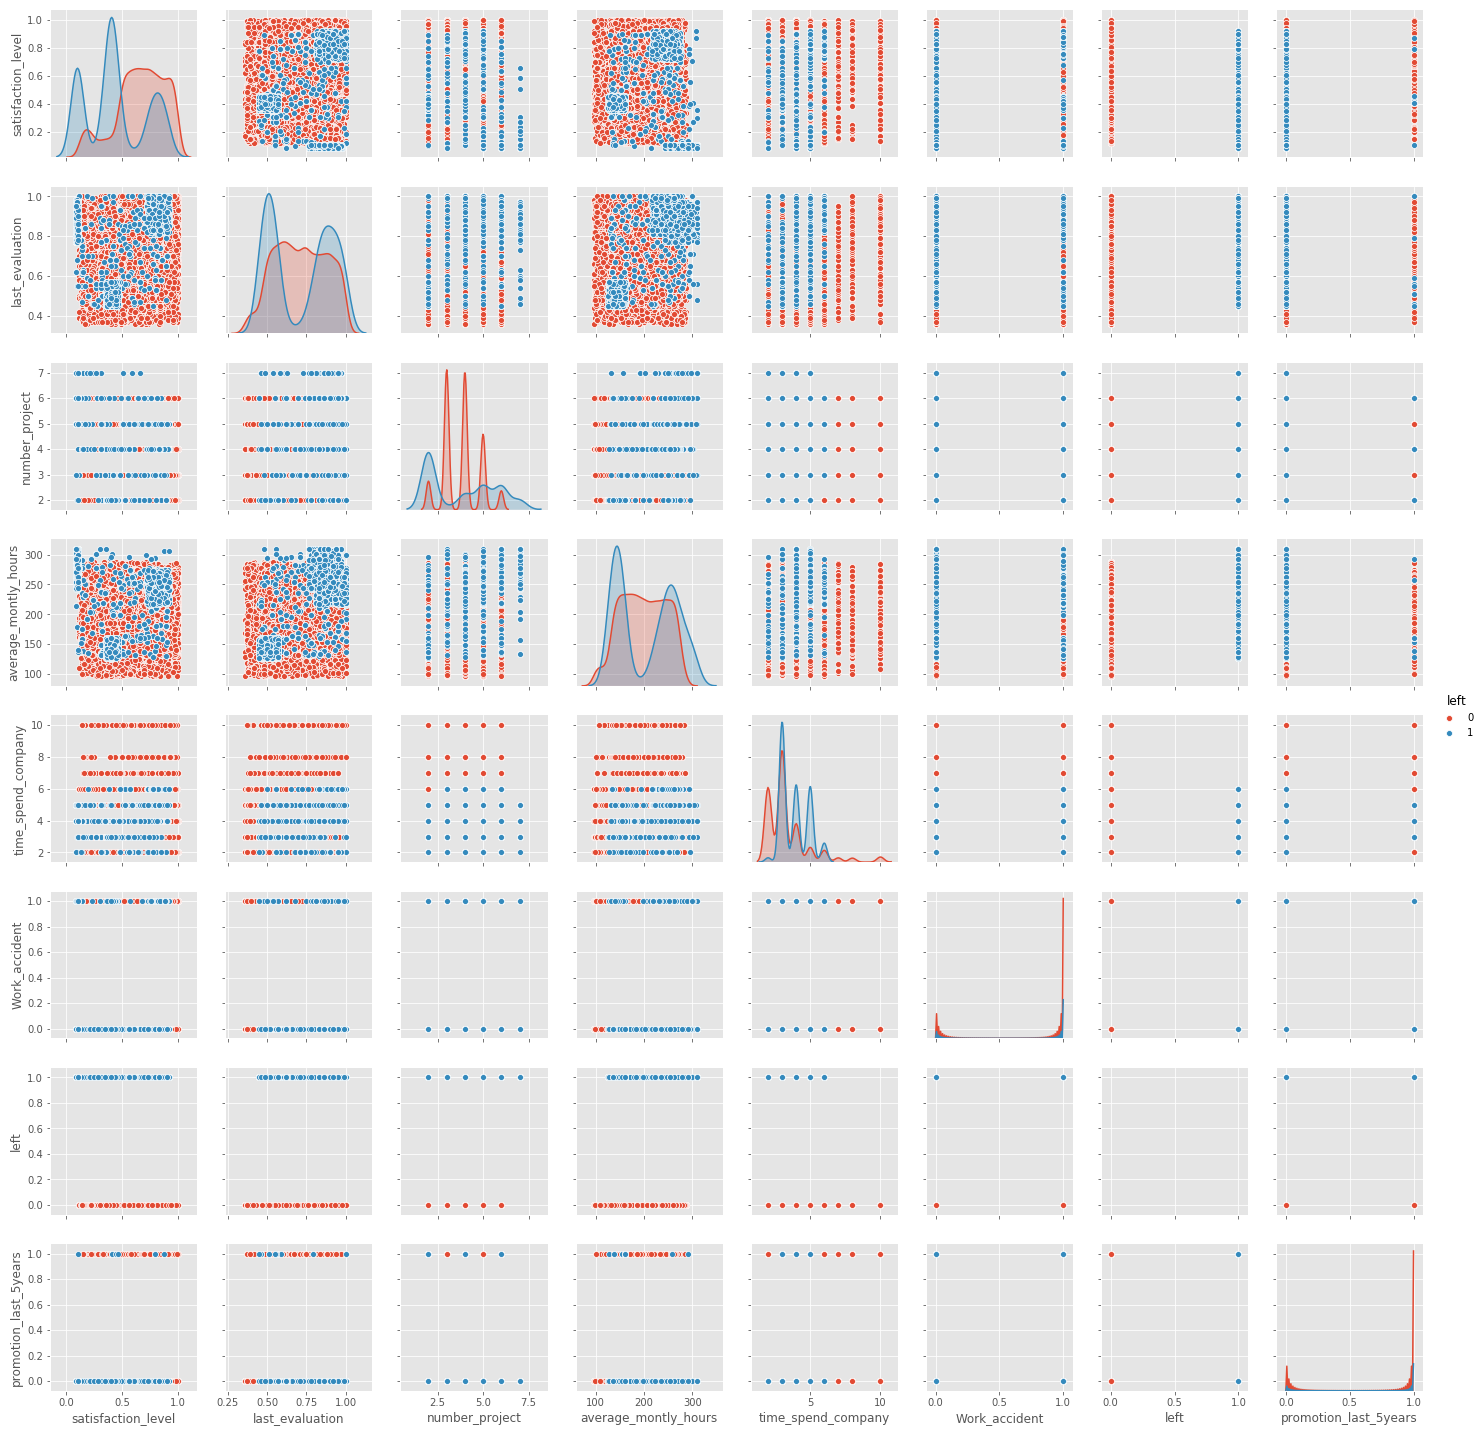

In [6]:
sns.pairplot(X_train, hue='left');

## Exploratory EDA

In [20]:
X_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

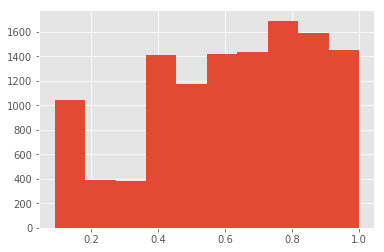

In [21]:
X_train['satisfaction_level'].hist()

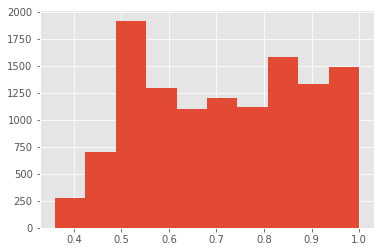

In [22]:
X_train['last_evaluation'].hist()

In [23]:
churn_df.head() #a few categorical variables

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


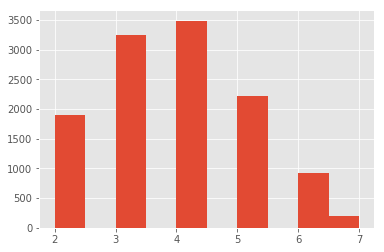

In [24]:
X_train['number_project'].hist()

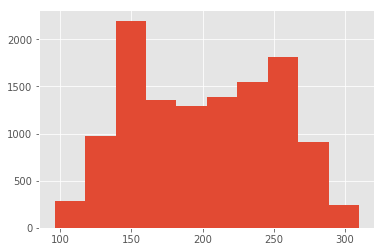

In [25]:
X_train['average_montly_hours'].hist()

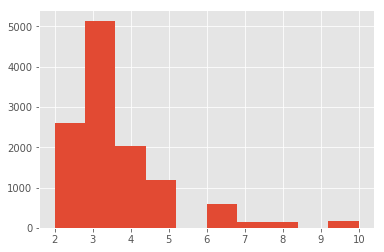

In [26]:
X_train['time_spend_company'].hist() #how many years have they been there? Could create a feature of left by years

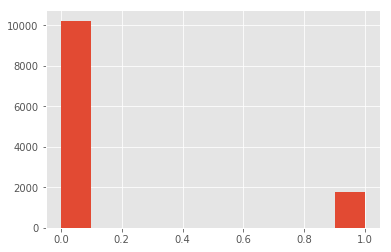

In [27]:
X_train['Work_accident'].hist() # most people haven't suffered an accident

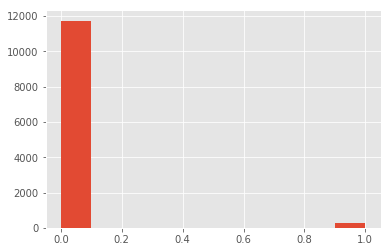

In [28]:
X_train['promotion_last_5years'].hist() #very few have been promoted

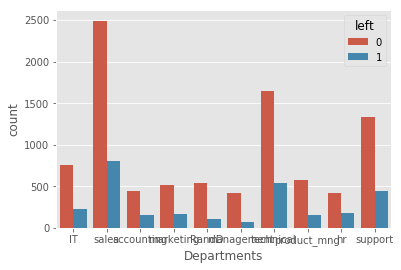

In [19]:
X_train.columns = X_train.columns.str.strip()
a = sns.countplot('Departments',data=X_train, hue='left') #sales had most attrition
#g.set_xticklabels(rotation=30)

In [20]:
X_train.Departments.unique()

array(['IT', 'sales', 'accounting', 'marketing', 'RandD', 'management',
       'technical', 'product_mng', 'hr', 'support'], dtype=object)

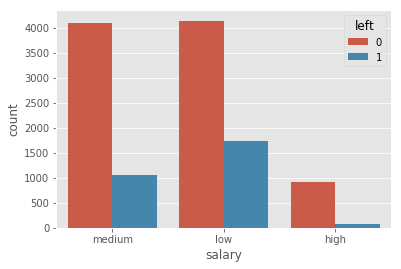

In [38]:
sns.countplot('sailary',data=X_train, hue='left') #higher salary were more likely to leave

In [21]:
X_train = pd.concat([X_train, pd.get_dummies(X_train['Departments'])], axis=1)
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
1745,0.09,0.78,6,260,4,0,1,0,IT,medium,1,0,0,0,0,0,0,0,0,0
4208,0.96,0.84,4,272,4,1,0,0,sales,medium,0,0,0,0,0,0,0,1,0,0
11069,0.14,0.56,5,259,4,1,0,0,IT,low,1,0,0,0,0,0,0,0,0,0
7037,0.47,0.47,2,221,6,0,0,0,sales,low,0,0,0,0,0,0,0,1,0,0
6440,0.14,0.74,4,117,5,0,0,0,accounting,medium,0,0,1,0,0,0,0,0,0,0


In [22]:
X_train = pd.concat([X_train, pd.get_dummies(X_train['salary'])], axis=1)
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
1745,0.09,0.78,6,260,4,0,1,0,IT,medium,...,0,0,0,0,0,0,0,0,0,1
4208,0.96,0.84,4,272,4,1,0,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
11069,0.14,0.56,5,259,4,1,0,0,IT,low,...,0,0,0,0,0,0,0,0,1,0
7037,0.47,0.47,2,221,6,0,0,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
6440,0.14,0.74,4,117,5,0,0,0,accounting,medium,...,0,0,0,0,0,0,0,0,0,1


In [23]:
X_train.drop(['left','Departments','salary'],axis=1,inplace=True)

In [24]:
X_train.shape

(11999, 20)

In [27]:
X_train.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
satisfaction_level,1.000000,0.111874,-0.138520,-0.005676,-0.092696,0.059896,0.029770,0.004483,0.008472,-0.020405,-0.016454,0.006745,0.004009,0.001190,0.008226,0.003617,-0.006782,0.027684,-0.046951,0.032083
last_evaluation,0.111874,1.000000,0.348997,0.340253,0.135436,-0.011540,-0.007935,-0.008597,-0.001500,0.007489,-0.015944,0.014672,-0.002228,0.005032,-0.020065,0.018892,0.008252,-0.019010,0.002651,0.007857
number_project,-0.138520,0.348997,1.000000,0.414593,0.196675,0.000097,-0.006006,0.006860,0.011353,0.008500,-0.033078,0.011886,-0.027493,0.005709,-0.011506,0.002340,0.020315,-0.006725,-0.006571,0.010363
average_montly_hours,-0.005676,0.340253,0.414593,1.000000,0.131581,-0.004164,0.001517,0.002479,0.001597,0.005720,-0.013964,0.004150,-0.011297,0.001574,0.002040,0.001384,0.001958,-0.011661,0.000981,0.005471
time_spend_company,-0.092696,0.135436,0.196675,0.131581,1.000000,0.007350,0.066943,-0.009886,-0.019272,0.002361,-0.027602,0.131282,0.014270,-0.000541,0.010490,-0.022899,-0.034418,0.045324,-0.041855,0.017161
Work_accident,0.059896,-0.011540,0.000097,-0.004164,0.007350,1.000000,0.035167,-0.011415,0.014229,-0.017153,-0.020316,0.006217,0.012607,0.001474,-0.004195,0.011565,0.003550,0.007067,-0.007398,0.003556
promotion_last_5years,0.029770,-0.007935,-0.006006,0.001517,0.066943,0.035167,1.000000,-0.041050,0.022302,-0.006068,-0.005645,0.125844,0.056089,-0.038249,0.014121,-0.030698,-0.039950,0.077109,-0.085859,0.043995
IT,0.004483,-0.008597,0.006860,0.002479,-0.009886,-0.011415,-0.041050,1.000000,-0.071396,-0.069193,-0.068709,-0.062276,-0.073835,-0.076492,-0.185106,-0.125265,-0.141649,-0.019218,0.006388,0.004197
RandD,0.008472,-0.001500,0.011353,0.001597,-0.019272,0.014229,0.022302,-0.071396,1.000000,-0.054694,-0.054311,-0.049226,-0.058364,-0.060464,-0.146319,-0.099017,-0.111968,-0.014207,-0.017563,0.025613
accounting,-0.020405,0.007489,0.008500,0.005720,0.002361,-0.017153,-0.006068,-0.069193,-0.054694,1.000000,-0.052635,-0.047707,-0.056562,-0.058598,-0.141802,-0.095961,-0.108512,0.018789,-0.009594,-0.000721


## Baseline model - MVP / skateboard

In [43]:
def log_regression_baseline(X_train, y_train):
    #1 feature logistic regression
    lm1 = LogisticRegression()
    lm1.fit(X_train[['satisfaction_level']], y_train);
    lm1_score = lm1.score(X_train[['satisfaction_level']], y_train)
    lm1_coefs = lm1.coef_
    
    #all features
    lm2 = LogisticRegression()
    lm2.fit(X_train,y_train)
    lm2_score = lm2.score(X_train,y_train)
    lm2_coefs = lm2.coef_
    
    #knn
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    knn_score = (100*knn.score(X_train, y_train))
    
    #Gaussian NB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    gnb_score = (100*gnb.score(X_train, y_train))
    
    #SVM
    
    
    
    return lm1_score, lm2_score, knn_score, gnb_score

In [44]:
log_regression_baseline(X_train,y_train)

(0.7695641303441954, 0.79106592216018, 95.30794232852737, 66.23885323776982)

In [45]:
from sklearn import svm

In [48]:
svm_model = svm.SVC(kernel="rbf")
svm_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [52]:
sum(svm_model.predict(X_train)-y_train)/y_train.shape[0]

0.00900075006250521

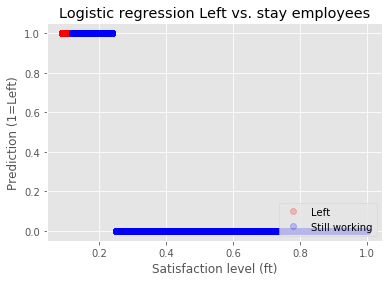

In [85]:
feature = X_train[['satisfaction_level']].values
prediction_hard = lm1.predict(feature)
sf_mask = (X_train['left'] == 1).values
plt.plot(feature[sf_mask], prediction_hard[sf_mask], 'ro', label='Left', alpha=0.2)
plt.plot(feature[~sf_mask], prediction_hard[~sf_mask], 'bo', label='Still working', alpha=0.2)
plt.ylim(-0.05, 1.05)
plt.xlabel('Satisfaction level')
plt.ylabel('Prediction (1=Left)')
plt.title('Logistic regression Left vs. stay employees')
plt.legend(loc='lower right');

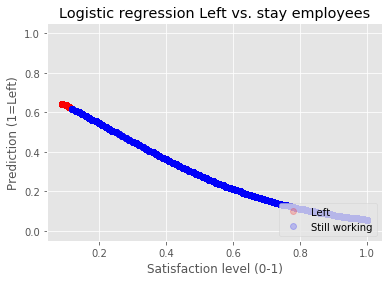

In [91]:
feature = X_train[['satisfaction_level']].values
prediction_soft = lm1.predict_proba(feature)[:, 1]

sf_mask = (X_train['left'] == 1).values

plt.plot(feature[sf_mask], prediction_soft[sf_mask], 'ro', label='Left', alpha=0.2)
plt.plot(feature[~sf_mask], prediction_soft[~sf_mask], 'bo', label='Retained', alpha=0.2)
plt.ylim(-0.05, 1.05)
plt.xlabel('Satisfaction level (0-1)')
plt.ylabel('Prediction (1=Left)')
plt.title('Logistic regression Left vs. Retained')
plt.legend(loc='lower right');

In [89]:
lm1.intercept_/lm1.coef_

array([[-0.24794257]])

In [110]:
confusion_matrix(y_train, prediction_hard)

array([[8510,  641],
       [2124,  724]])